#### Michael Perrine
#### DSC 640 
#### Data Visualization
#### Professor Schneider


<h1><center>White House Visitor Log Analysis</center></h1>

In [ ]:
# Import necessary libraries for annalysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import OneHotEncoder
import warnings


In [ ]:
# This allows me to view all columns in my data.
pd.set_option('display.max_columns', None)

In [ ]:
# Filters out unnecessary warnings.
warnings.filterwarnings('ignore')

In [ ]:
# Imports June data
june = pd.DataFrame(pd.read_excel('2023.06_WAVES-ACCESS-RECORDS.xlsx'))


In [ ]:
# Drops unneeded columns.
june = june.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [ ]:
# Organizes data chronologically.
june = june.sort_values(by='Appointment Start Date')

In [ ]:
# fills empty columns with a zero and renames the appointment start date to date, drops original
# appointment start date and reformats date object to a date time designation.
june['Total People']= june['Total People'].fillna(0) 
june['Date']= june['Appointment Start Date'].dt.date
june= june.drop(columns=['Appointment Start Date'])
june['Date']= pd.to_datetime(june['Date'], format='%Y-%m-%d')
june['Date'].dtype

dtype('<M8[ns]')

In [ ]:
# Displays data frame with the transformations.
june.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date
94322,GARCIA,JUAN,NaN,NaN,VA,2023-05-30 16:39:00,2023-06-01 23:59:00,0.0,CP,WIN,2023-05-31 07:25:00,CP,Powell,Charles,VPR,B25,POWELL,CHARLES,2023-06-01
2652,ANNEVELASCOGADOR,MARGARETTE,N,U83667,VA,2023-05-31 15:51:00,2023-06-01 23:59:00,10.0,VW,WIN,2023-05-31 16:34:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-06-01
7582,BHATT,ANISH,H,U83659,VA,2023-05-31 15:51:00,2023-06-01 23:59:00,30.0,VW,WIN,2023-05-31 16:11:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-06-01
82878,TA,THU,N,U83667,VA,2023-05-31 15:51:00,2023-06-01 23:59:00,10.0,VW,WIN,2023-05-31 16:34:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-06-01
60640,NGUYEN,MICHELLE,N,U83667,VA,2023-05-31 15:51:00,2023-06-01 23:59:00,10.0,VW,WIN,2023-05-31 16:34:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-06-01


In [ ]:
# Creates time series format by grouping total people by date.
june_gby = june.groupby(pd.Grouper(key='Date', freq= 'D'))['Total People'].sum()
june_gby = pd.DataFrame(june_gby)

In [ ]:
# Renames the colums. 
june_gby = june_gby.rename(columns={'Total People': 'June'})

In [ ]:
# Resets the index.
june_gby.reset_index(inplace=True)

In [ ]:
# Displays the first 5 rows of the prepared time series data.
june_gby.head()

,Date,June
0,2023-06-01,39143.0
1,2023-06-02,50843.0
2,2023-06-03,26999.0
3,2023-06-04,1616.0
4,2023-06-05,77089.0


In [ ]:
# Imports the July data set.
july = pd.DataFrame(pd.read_excel('2023.07_WAVES-ACCESS-RECORDS.xlsx'))

In [ ]:
# Sorts the data chronologically.
july = july.sort_values(by='Appointment Start Date')

In [ ]:
# Drops unnecessary columns.
july = july.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [ ]:
# Transforms data by filling empty columns, remaming and droping orginal date column, and
# changing the date data type from object to date time stamp.

july['Total People']= july['Total People'].fillna(0)
july['Date1']= july['Appointment Start Date'].dt.date
july = july.drop(columns=['Appointment Start Date'])
july['Date1']= pd.to_datetime(july['Date1'], format='%Y-%m-%d')
july['Date1'].dtype

dtype('<M8[ns]')

In [ ]:
# Displays transformed data.

july.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date1
22999,FIGUEROA,EDUARD,M,U02163,VA,2023-06-30 13:31:00,2023-07-01 23:59:00,30,VW,WIN,2023-06-30 14:21:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-07-01
77484,VANLANDINGHAM,CECELIA,M,U02163,VA,2023-06-30 13:31:00,2023-07-01 23:59:00,30,VW,WIN,2023-06-30 14:21:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-07-01
77482,VANLANDINGHAM,ALISA,M,U02163,VA,2023-06-30 13:31:00,2023-07-01 23:59:00,30,VW,WIN,2023-06-30 14:21:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-07-01
45071,LOTRIONTE,JILLIAN,S,U02144,VA,2023-06-30 13:30:00,2023-07-01 23:59:00,20,VW,WIN,2023-06-30 14:04:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-07-01
82041,WINNS,MIYA,G,U02135,VA,2023-06-30 13:30:00,2023-07-01 23:59:00,10,VW,WIN,2023-06-30 14:04:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-07-01


In [ ]:
# Creates the time series data grouping total people by date.

july_gby = july.groupby(pd.Grouper(key='Date1', freq= 'D'))['Total People'].sum()
july_gby = pd.DataFrame(july_gby)

In [ ]:
# Renames total people column to month.

july_gby = july_gby.rename(columns={'Total People': 'July'})

In [ ]:
# Resets the index.

july_gby.reset_index(inplace=True)

In [ ]:
# Displays the first 5 rows of the time series data.

july_gby.head()

,Date1,July
0,2023-07-01,23632
1,2023-07-02,1994
2,2023-07-03,4331
3,2023-07-04,3566551
4,2023-07-05,26758


In [ ]:
# Import August data.

aug = pd.DataFrame(pd.read_excel('2023.08_WAVES-ACCESS-RECORDS.xlsx'))

In [ ]:
# Remove unneeded columns.

aug = aug.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [ ]:
# Sort data chronologically.

aug = aug.sort_values(by='Appointment Start Date')

In [ ]:
# August data had June included. Needed to filter out June data.

aug = aug[aug['Appointment Start Date'].dt.month == 8]

In [ ]:
# Transform data to fill null values , rename date column, drop orininal date column,
# and change date from object to date time stamp.

aug['Total People']= aug['Total People'].fillna(0)
aug['Date2']= aug['Appointment Start Date'].dt.date
aug = aug.drop(columns=['Appointment Start Date'])
aug['Date2']= pd.to_datetime(aug['Date2'], format='%Y-%m-%d')
aug['Date2'].dtype

dtype('<M8[ns]')

In [ ]:
# Display the transformed data frame.

aug.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date2
137,ABUISA,EYAD,I,U30619,VA,2023-08-24 13:00:00,2023-08-26 23:59:00,6,TW,WIN,2023-08-24 13:01:00,TW,DeRusha,Christopher,WH,WEST WING,WW,TOUR,2023-08-01
138,ABUISA,HEBA,E,U30619,VA,2023-08-24 13:00:00,2023-08-26 23:59:00,6,TW,WIN,2023-08-24 13:01:00,TW,DeRusha,Christopher,WH,WEST WING,WW,TOUR,2023-08-01
195,ADAMS,ALEXANDER,J,U22350,VA,2023-07-31 16:52:00,2023-08-01 23:59:00,56,SM,WIN,2023-07-31 17:22:00,SM,Maher,Sophie,OEOB,350,MAHER,SOPHIE,2023-08-01
194,ADAMIAN,ALEX,N,U29947,VA,2023-08-23 03:03:00,2023-08-30 23:59:00,2,VW,WIN,2023-08-23 11:37:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-08-01
193,ADAMES,JOHANNY,M,U31232,VA,2023-08-25 10:54:00,2023-08-26 23:59:00,251,VW,WIN,2023-08-25 13:35:00,VW,Office,Visitors,WH,EW - RES,WAVES,VISITORSOFFICE,2023-08-01


In [ ]:
# Create time series data by grouping total people by date.

aug_gby = aug.groupby(pd.Grouper(key='Date2', freq= 'D'))['Total People'].sum()
aug_gby = pd.DataFrame(aug_gby)

In [ ]:
# rename total people column to Aug.

aug_gby = aug_gby.rename(columns={'Total People': 'Aug'})

In [ ]:
# Reset index.

aug_gby.reset_index(inplace=True)

In [ ]:
# Display the first 5 rows of the time series data frame.

aug_gby.head()

,Date2,Aug
0,2023-08-01,55140
1,2023-08-02,57177
2,2023-08-03,53700
3,2023-08-04,54996
4,2023-08-05,50445


In [ ]:
# Load September data.

sept = pd.DataFrame(pd.read_excel('2023.09_WAVES-ACCESS-RECORDS.xlsx'))

In [ ]:
# Remove unneeded data.

sept = sept.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [ ]:
# Sort values chronlogically.

sept = sept.sort_values(by='Appointment Start Date')

In [ ]:
# Fill nan with 0, rename date column, drop old date column, and change date 
# from object to date time stamp.

sept['Total People']= sept['Total People'].fillna(0)
sept['Date3']= sept['Appointment Start Date'].dt.date
sept = sept.drop(columns=['Appointment Start Date'])
sept['Date3']= pd.to_datetime(sept['Date3'], format='%Y-%m-%d')
sept['Date3'].dtype

dtype('<M8[ns]')

In [ ]:
# View the first 5 rows of the transformed data frame.

sept.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date3
6913,BREEDLOVE,DAPHNE,C,U34772,VA,2023-08-31 13:16:00,2023-09-01 23:59:00,10,VW,WIN,2023-08-31 13:23:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-09-01
67901,WOODWARD,ALISON,M,U34774,VA,2023-08-31 13:15:00,2023-09-01 23:59:00,10,VW,WIN,2023-08-31 13:26:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-09-01
67904,WOODWARD,BRYAN,E,U34774,VA,2023-08-31 13:15:00,2023-09-01 23:59:00,10,VW,WIN,2023-08-31 13:26:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-09-01
34635,LARSON,BETSEY,A,U34772,VA,2023-08-31 13:16:00,2023-09-01 23:59:00,10,VW,WIN,2023-08-31 13:23:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-09-01
6914,BREEDLOVE,LOGAN,V,U34772,VA,2023-08-31 13:16:00,2023-09-01 23:59:00,10,VW,WIN,2023-08-31 13:23:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-09-01


In [ ]:
# Create a time series data frame with total people on date.

sept_gby = sept.groupby(pd.Grouper(key='Date3', freq= 'D'))['Total People'].sum()
sept_gby = pd.DataFrame(sept_gby)

In [ ]:
# Rename the total people column with the month.

sept_gby = sept_gby.rename(columns={'Total People': 'Sept'})

In [ ]:
# Reset index.

sept_gby.reset_index(inplace=True)

In [ ]:
# Display the top 5 rows. 

sept_gby.head()

,Date3,Sept
0,2023-09-01,19548
1,2023-09-02,18208
2,2023-09-03,2392
3,2023-09-04,2
4,2023-09-05,60808


In [ ]:
# Load October data frame.

oct = pd.DataFrame(pd.read_excel('2023.10_WAVES-ACCESS-RECORDS.xlsx'))

In [ ]:
# Sort data chronologically.

oct= oct.sort_values(by='Appointment Start Date')

In [ ]:
# Drop unnecessary columns.

oct = oct.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [ ]:
# Fill na with 0, rename date column, drop old date column, and change date from object
# to a date time format.

oct['Total People']= oct['Total People'].fillna(0)
oct['Date4']= oct['Appointment Start Date'].dt.date
oct = oct.drop(columns=['Appointment Start Date'])
oct['Date4']= pd.to_datetime(oct['Date4'], format='%Y-%m-%d')
oct['Date4'].dtype

dtype('<M8[ns]')

In [ ]:
# View the first 5 rows of the transformed data frame.

oct.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date4
45216,MALVEAUXJEANPIERRE,SOLEIL,M,U54031,VA,2023-09-30 20:58:00,2023-10-01 23:59:00,1,AB,WIN,2023-10-01 11:09:00,AB,Bayless,Allyson,WH,WW140,BAYLESS,ALLYSON,2023-10-01
28653,GYANESH,KUMAR,N,U53595,VA,2023-09-29 12:00:00,2023-10-01 23:59:00,5,TW,WIN,2023-09-29 14:34:00,TW,Dickerson,Royce,WH,WEST WING,WW,TOUR,2023-10-01
24549,GALANTI,CHARLENE,L,U53461,VA,2023-09-29 12:00:00,2023-10-01 23:59:00,3,TW,WIN,2023-09-29 12:01:00,TW,Galanti,Meredith,WH,WEST WING,WW,TOUR,2023-10-01
38024,KERNOHAN,PAUL,I,U53579,VA,2023-09-29 12:00:00,2023-10-01 23:59:00,2,TW,WIN,2023-09-29 14:00:00,TW,Ried,Curtis,WH,WEST WING,WW,TOUR,2023-10-01
68547,SINGH,SURYA,P,U53595,VA,2023-09-29 12:00:00,2023-10-01 23:59:00,5,TW,WIN,2023-09-29 14:34:00,TW,Dickerson,Royce,WH,WEST WING,WW,TOUR,2023-10-01


In [ ]:
# Build time series data frame based on total people and date.

oct_gby = oct.groupby(pd.Grouper(key='Date4', freq= 'D'))['Total People'].sum()
oct_gby = pd.DataFrame(oct_gby)

In [ ]:
# Rename total people column to month.

oct_gby=oct_gby.rename(columns={'Total People': 'Oct'})

In [ ]:
# Reset index.

oct_gby.reset_index(inplace=True)

In [ ]:
# View the first 5 rows of the time series data frame.

oct_gby.head()

,Date4,Oct
0,2023-10-01,1639
1,2023-10-02,44548
2,2023-10-03,21594
3,2023-10-04,21035
4,2023-10-05,21244


In [ ]:
# Load November data.

nov = pd.DataFrame(pd.read_excel('2023.11_WAVES-ACCESS-RECORDS.xlsx'))

In [ ]:
# Drop unneeded columns.

nov = nov.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [52]:
nov = nov.sort_values(by='Appointment Start Date')

In [ ]:
# Fill nan with 0, create new date column, drop old date column, and change date from 
# object to date time stamp.

nov['Total People']= nov['Total People'].fillna(0)
nov['Date5']= nov['Appointment Start Date'].dt.date
nov = nov.drop(columns=['Appointment Start Date'])
nov['Date5']= pd.to_datetime(nov['Date5'], format='%Y-%m-%d')
nov['Date5'].dtype

dtype('<M8[ns]')

In [ ]:
# Display the4 first 5 rows of the transformed data frame.

nov.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date5
5964,CHAUDHARY,DIMPLE,N,U70821,VA,2023-10-30 10:18:00,2023-11-01 23:59:00,1,CM,WIN,2023-10-30 10:34:00,CM,Adhar,Radha,WH,WW,MARCONI,CLAUDIA,2023-11-01
19148,KUKLISH,MATILDA,N,U72057,VA,2023-10-31 17:06:00,2023-11-01 23:59:00,1,RB,WIN,2023-10-31 17:08:00,RB,Boseck,Ashlea,WH,WHSR,BURKE,RYAN,2023-11-01
19134,KUEHN,CANDRA,L,U69564,VA,2023-10-26 15:41:00,2023-11-01 23:59:00,2,WA,WIN,2023-10-26 15:55:00,WA,Williams,Betty,OEOB,027-Didlake Office,ANDERSON,WENDY,2023-11-01
18089,KELPY,DAWN,A,U69564,VA,2023-10-26 15:41:00,2023-11-01 23:59:00,2,WA,WIN,2023-10-26 15:55:00,WA,Williams,Betty,OEOB,027-Didlake Office,ANDERSON,WENDY,2023-11-01
29556,RIGG,JESSE,L,U72065,VA,2023-10-31 18:04:00,2023-11-01 23:59:00,10,VW,WIN,2023-10-31 18:06:00,VW,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,2023-11-01


In [ ]:
# Create time series data frame based on total people and date.

nov_gby = nov.groupby(pd.Grouper(key='Date5', freq= 'D'))['Total People'].sum()
nov_gby = pd.DataFrame(nov_gby)

In [ ]:
# Rename total people column with month.

nov_gby = nov_gby.rename(columns={'Total People': 'Nov' })

In [ ]:
# Reset index

nov_gby.reset_index(inplace=True)

In [ ]:
# Display the first 5 rows of the time series data frame.

nov_gby.head()

,Date5,Nov
0,2023-11-01,31959
1,2023-11-02,34574
2,2023-11-03,18886
3,2023-11-04,45630
4,2023-11-05,2892


In [ ]:
# Load December data.

dec = pd.DataFrame(pd.read_excel('2023.12_WAVES-ACCESS-RECORDS.xlsx'))

In [ ]:
# Sort data in chronological data.

dec = dec.sort_values(by='Appointment Start Date')

In [ ]:
# Drop unneeded data.

dec = dec.drop(columns=['BDGNBR', 'TOA', 'POA', 'TOD', 'POD',
                           'Appointment Cancel Date','Caller Room', 'Release Date'])

In [ ]:
# Fill nan with 0, create new date column, drop old date column, convert date from 
# object to date time stamp.

dec['Total People']= dec['Total People'].fillna(0)
dec['Date6']= dec['Appointment Start Date'].dt.date
dec = dec.drop(columns=['Appointment Start Date'])
dec['Date6']= pd.to_datetime(dec['Date6'], format='%Y-%m-%d')
dec['Date6'].dtype

dtype('<M8[ns]')

In [ ]:
# Display the first 5 rows of the transformed data set.

dec.head()

,Last Name,First Name,Middle Initial,UIN,Access Type,Appointment Made Date,Appointment End Date,Total People,Last Updated By,POST,Last Entry Date,Terminal Suffix,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Date6
88253,ROEPKE,CASEY,C,U79795,VA,2023-11-27 15:06:00,2023-12-01 23:59:00,1,GG,WIN,2023-11-27 16:08:00,GG,Giro,Gabriela,OEOB,454,GIRO,GABRIELA,2023-12-01
12283,BROUSE,ERIC,R,U82325,VA,2023-11-30 18:02:00,2023-12-01 23:59:00,9,DJ,WIN,2023-11-30 18:12:00,DJ,POTUS,NaN,WH,EW,JONES,DETERRIAN,2023-12-01
74561,NEALON,KELEIGH,C,U82325,VA,2023-11-30 18:02:00,2023-12-01 23:59:00,9,DJ,WIN,2023-11-30 18:12:00,DJ,POTUS,NaN,WH,EW,JONES,DETERRIAN,2023-12-01
60081,LEWIS,CHASE,D,U82325,VA,2023-11-30 18:02:00,2023-12-01 23:59:00,9,DJ,WIN,2023-11-30 18:12:00,DJ,POTUS,NaN,WH,EW,JONES,DETERRIAN,2023-12-01
114109,WOODS,HIATT,C,U82325,VA,2023-11-30 18:02:00,2023-12-01 23:59:00,9,DJ,WIN,2023-11-30 18:12:00,DJ,POTUS,NaN,WH,EW,JONES,DETERRIAN,2023-12-01


In [ ]:
# Create a time series data set using total people and grouped by date.

dec_gby = dec.groupby(pd.Grouper(key='Date6', freq= 'D'))['Total People'].sum()
dec_gby = pd.DataFrame(dec_gby)

In [ ]:
# Rename total people column with month

dec_gby = dec_gby.rename(columns={'Total People': 'Dec' })

In [ ]:
# Reset index.

dec_gby.reset_index(inplace=True)

In [ ]:
# Display the first 5 rows of the time series data set.

dec_gby.head()


,Date6,Dec
0,2023-12-01,751306
1,2023-12-02,910011
2,2023-12-03,30201
3,2023-12-04,799341
4,2023-12-05,153060


In [ ]:
# Combine all monthly data frames into one.

comb_wh = pd.concat([june_gby, july_gby, aug_gby,sept_gby,oct_gby, nov_gby, dec_gby], axis=1)

In [ ]:
# Convert concatanated data into a pandas dataframe.

comb_wh= pd.DataFrame(comb_wh)

In [ ]:
# drop dates for July through December.

comb_wh = comb_wh.drop(columns=['Date1', 'Date2', 'Date3','Date4', 'Date5', 'Date6'])


In [ ]:
# Added an additional date to June.

fill_date = pd.to_datetime('2023/7/31')
comb_wh['Date'] = comb_wh['Date'].fillna(value=fill_date)

In [ ]:
# View complete timeseries data frame.

comb_wh

,Date,June,July,Aug,Sept,Oct,Nov,Dec
0,2023-06-01,39143.0,23632,55140,19548.0,1639,31959.0,751306
1,2023-06-02,50843.0,1994,57177,18208.0,44548,34574.0,910011
2,2023-06-03,26999.0,4331,53700,2392.0,21594,18886.0,30201
3,2023-06-04,1616.0,3566551,54996,2.0,21035,45630.0,799341
4,2023-06-05,77089.0,26758,50445,60808.0,21244,2892.0,153060
5,2023-06-06,37050.0,20691,7054,11471.0,33958,4021.0,761200
6,2023-06-07,46300.0,54723,9275,16064.0,23194,37506.0,513853
7,2023-06-08,56650.0,22094,11927,20539.0,32564,144278.0,301591
8,2023-06-09,213723.0,2999,8284,269630.0,565,30996.0,446658
9,2023-06-10,7126212.0,2993,11980,1966.0,36342,236.0,502380


In [ ]:
# Format date column to day and year.

comb_wh['Date'] = pd.to_datetime(comb_wh['Date'], format='%Y-%d')

In [ ]:
# Fill nan with 0.
comb_wh = comb_wh.fillna(0)

In [ ]:
# Change June , September, and November columns from object to integer data types.

comb_wh[['June','Sept','Nov']]= comb_wh[['June','Sept','Nov']].astype(int)

In [ ]:
# Convert date to an object.

comb_wh['Date'] = comb_wh['Date'].dt.strftime('%d/%Y')

In [ ]:
# View reformatted data frame.

comb_wh

,Date,June,July,Aug,Sept,Oct,Nov,Dec
0,01/2023,39143,23632,55140,19548,1639,31959,751306
1,02/2023,50843,1994,57177,18208,44548,34574,910011
2,03/2023,26999,4331,53700,2392,21594,18886,30201
3,04/2023,1616,3566551,54996,2,21035,45630,799341
4,05/2023,77089,26758,50445,60808,21244,2892,153060
5,06/2023,37050,20691,7054,11471,33958,4021,761200
6,07/2023,46300,54723,9275,16064,23194,37506,513853
7,08/2023,56650,22094,11927,20539,32564,144278,301591
8,09/2023,213723,2999,8284,269630,565,30996,446658
9,10/2023,7126212,2993,11980,1966,36342,236,502380


In [ ]:
# Melt data with new column names.

wh_melt = comb_wh.melt(id_vars='Date', var_name='Months', value_name='Attendance')

In [ ]:
# View the new melted data frame.

wh_melt

,Date,Months,Attendance
0,01/2023,June,39143
1,02/2023,June,50843
2,03/2023,June,26999
3,04/2023,June,1616
4,05/2023,June,77089
...,...,...,...
212,27/2023,Dec,1435
213,28/2023,Dec,926
214,29/2023,Dec,2066
215,30/2023,Dec,1928


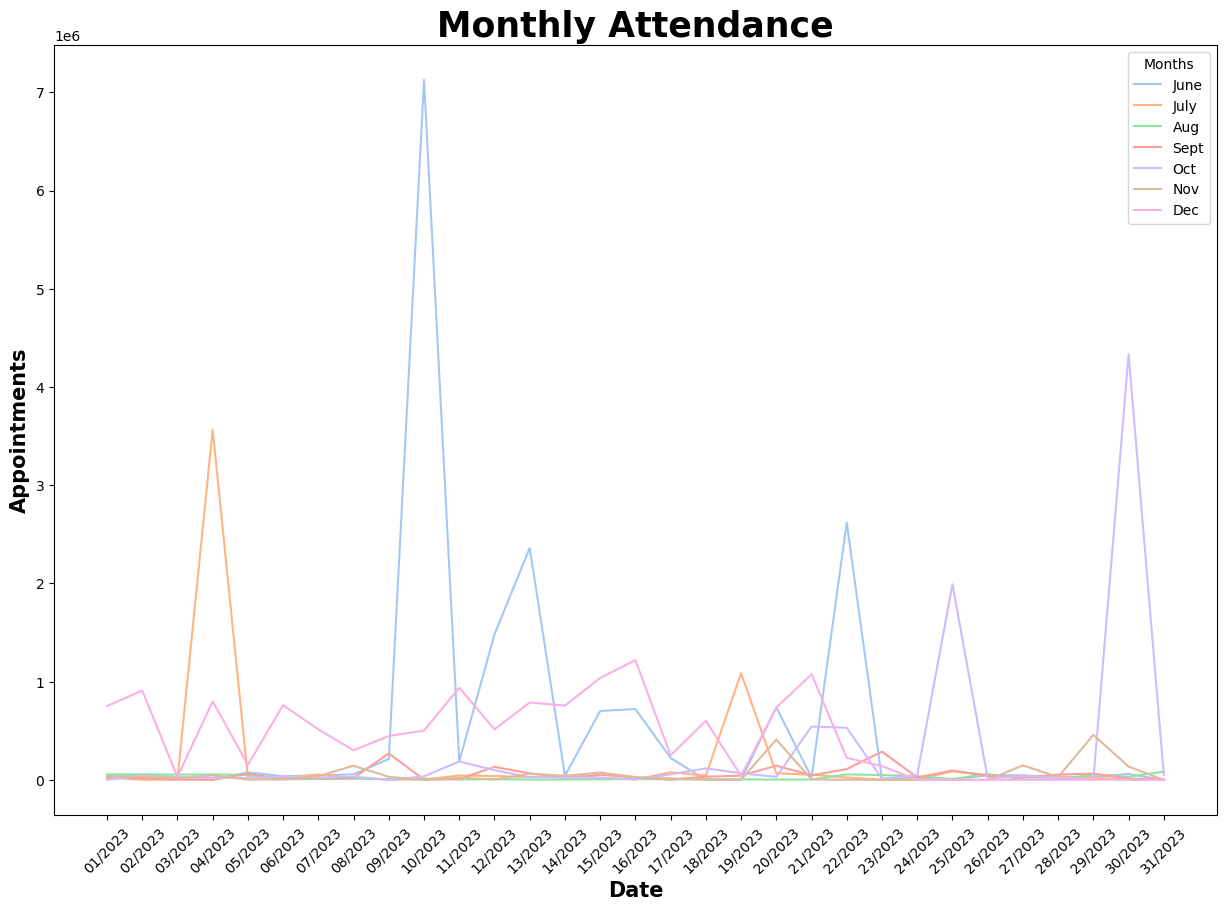

In [ ]:
# Buld line plot.

plt.figure(figsize=(15,10))
sns.lineplot(data= wh_melt, x = 'Date', y = 'Attendance', hue='Months', palette='pastel')

plt.title('Monthly Attendance', fontsize=25, weight='bold')
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Appointments', fontsize=15, weight='bold')
plt.xticks(rotation=45)


plt.show()

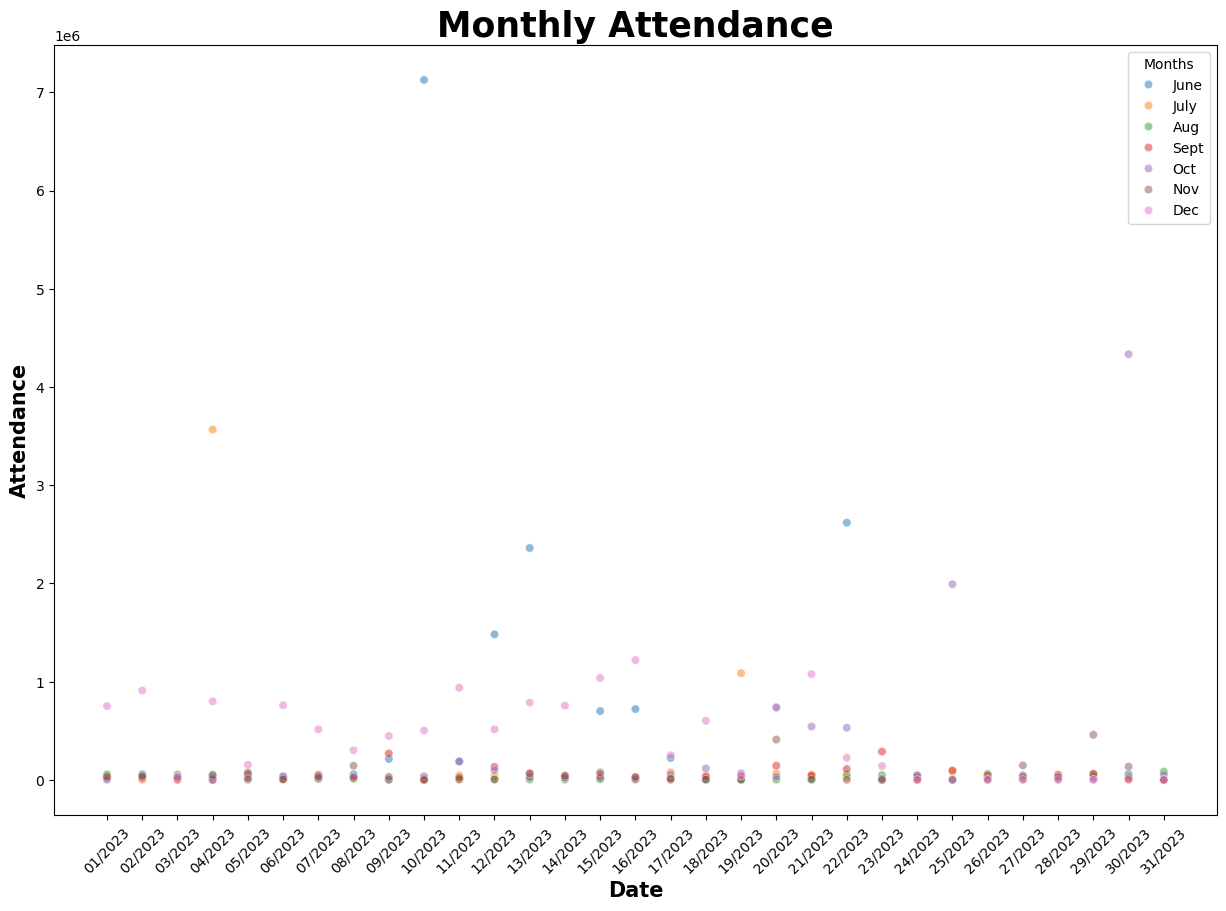

In [ ]:
# Build scatter plot.

plt.figure(figsize=(15,10))
sns.scatterplot(data=wh_melt, x='Date', y='Attendance', hue='Months', alpha = 0.5)

plt.title('Monthly Attendance', fontsize=25, weight='bold')
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Attendance', fontsize=15, weight='bold')
plt.xticks(rotation=45)

plt.show()

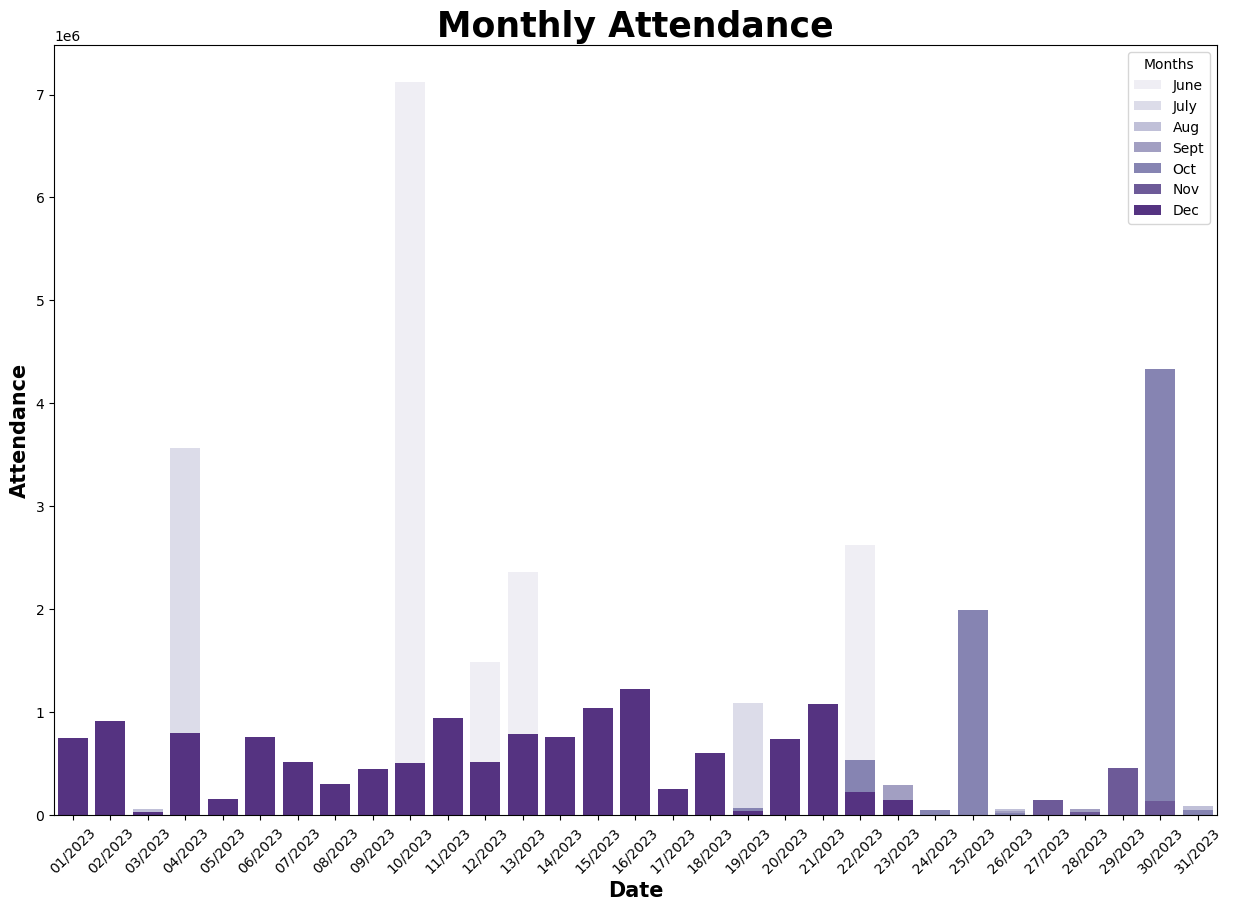

In [ ]:
# Build stacked bar plot.

plt.figure(figsize=(15,10))
sns.barplot(data=wh_melt, x = 'Date', y = 'Attendance', hue = 'Months', dodge = False, palette='Purples')
plt.title ('Monthly Attendance', fontsize = 25, weight = 'bold')
plt.xlabel('Date', fontsize=15, weight = 'bold')
plt.ylabel('Attendance', fontsize=15, weight = 'bold')
plt.xticks(rotation = 45)


plt.show()

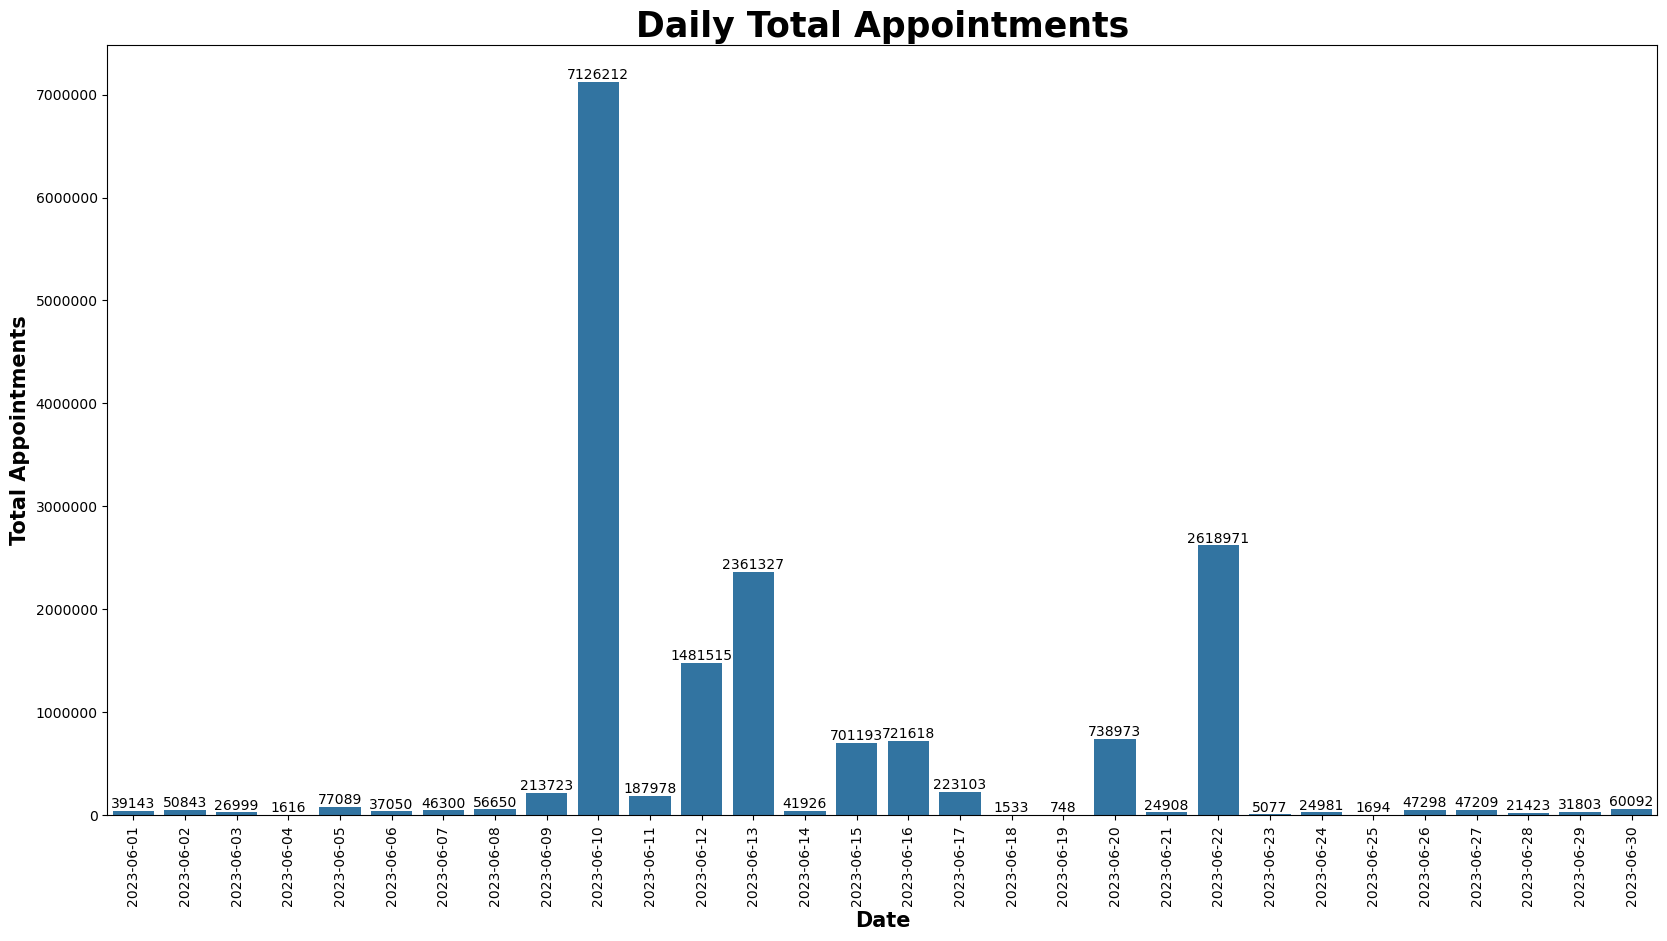

In [ ]:
# Build bar plot.

plt.figure(figsize=(20,10))
ax = sns.barplot(june_gby, x='Date', y='June')
ax.bar_label(ax.containers[0],fmt= '%.0f')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Daily Total Appointments', fontsize = 25, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Total Appointments', fontsize = 15, weight = 'bold')

plt.xticks(rotation= 90)

plt.show()

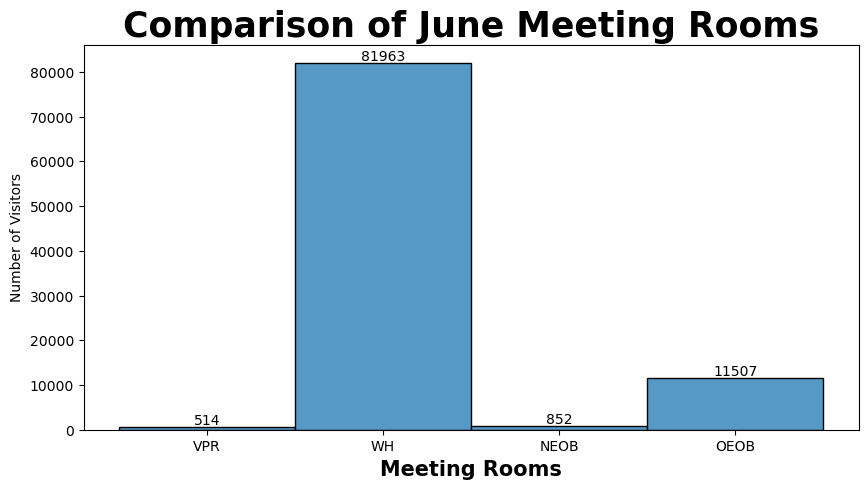

In [ ]:
# Build histogram for June.

plt.figure(figsize=(10,5))
ax = sns.histplot(data = june, x = 'Meeting Location')
ax.bar_label(ax.containers[0],fmt= '%.0f')
plt.title('Comparison of June Meeting Rooms', fontsize=25, weight = 'bold')
plt.xlabel('Meeting Rooms', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Visitors')
plt.show()

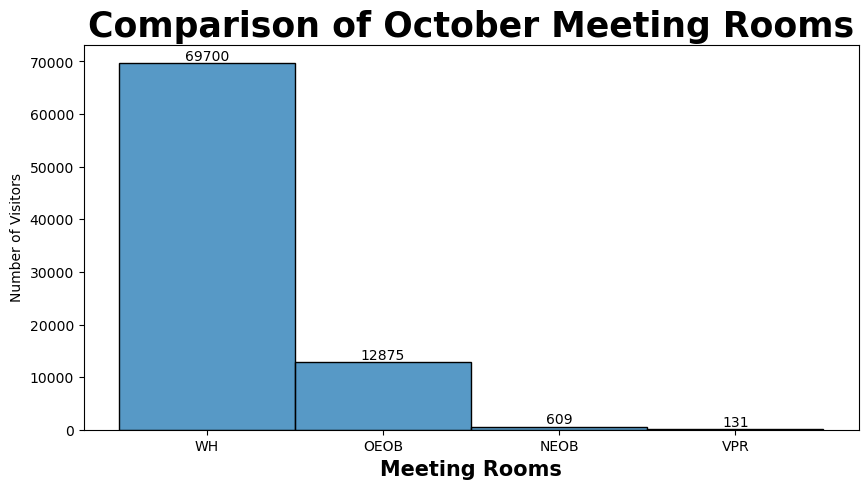

In [ ]:
# Build histogram for October.

plt.figure(figsize=(10,5))
ax = sns.histplot(data = oct, x = 'Meeting Location')
ax.bar_label(ax.containers[0],fmt= '%.0f')
plt.title('Comparison of October Meeting Rooms', fontsize=25, weight = 'bold')
plt.xlabel('Meeting Rooms', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Visitors')
plt.show()

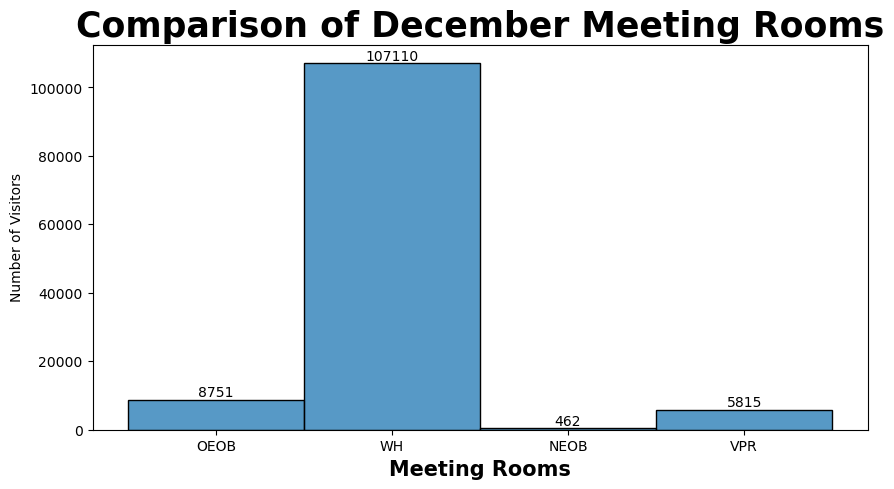

In [ ]:
# Build histogram for December.

plt.figure(figsize=(10,5))
ax = sns.histplot(data = dec, x = 'Meeting Location')
ax.bar_label(ax.containers[0],fmt= '%.0f')
plt.title('Comparison of December Meeting Rooms', fontsize=25, weight = 'bold')
plt.xlabel('Meeting Rooms', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Visitors')
plt.show()